# Chapter 8: How to analyze the data

In [2]:
import pandas as pd
import seaborn as sns

## How to melt columns to create long data

In [4]:
import os
print(os.getcwd())

/home/e5cabe61-5c11-40b8-8dd1-55fe185449cd


In [5]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/e5cabe61-5c11-40b8-8dd1-55fe185449cd


In [6]:
cars = pd.read_pickle('cars.pkl')

In [7]:
cars = pd.read_pickle('cars.pkl')

In [8]:
cars.head()

aspiration      carbody  enginesize  curbweight    price
0        std  convertible         130        2548  13495.0
1        std  convertible         130        2548  16500.0
2        std    hatchback         152        2823  16500.0
3        std        sedan         109        2337  13950.0
4        std        sedan         136        2824  17450.0

In [9]:
cars_melted = pd.melt(cars, id_vars='price',
                      value_vars=['enginesize','curbweight'],
                      var_name='feature', value_name='featureValue')
cars_melted

price     feature  featureValue
0    13495.0  enginesize           130
1    16500.0  enginesize           130
2    16500.0  enginesize           152
3    13950.0  enginesize           109
4    17450.0  enginesize           136
..       ...         ...           ...
405  16845.0  curbweight          2952
406  19045.0  curbweight          3049
407  21485.0  curbweight          3012
408  22470.0  curbweight          3217
409  22625.0  curbweight          3062

[410 rows x 3 columns]

## How to plot melted columns

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


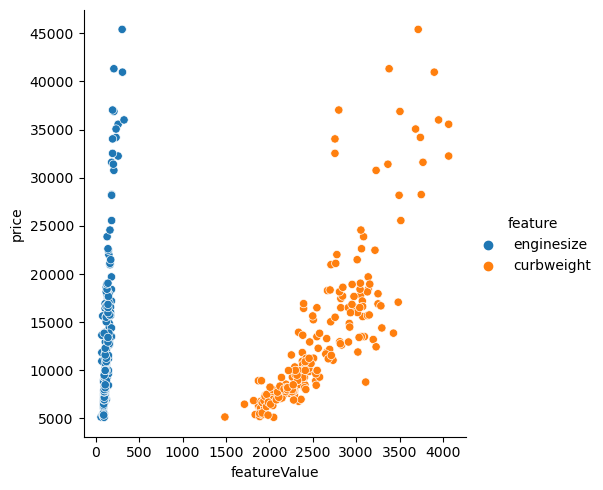

In [11]:
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            hue='feature')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


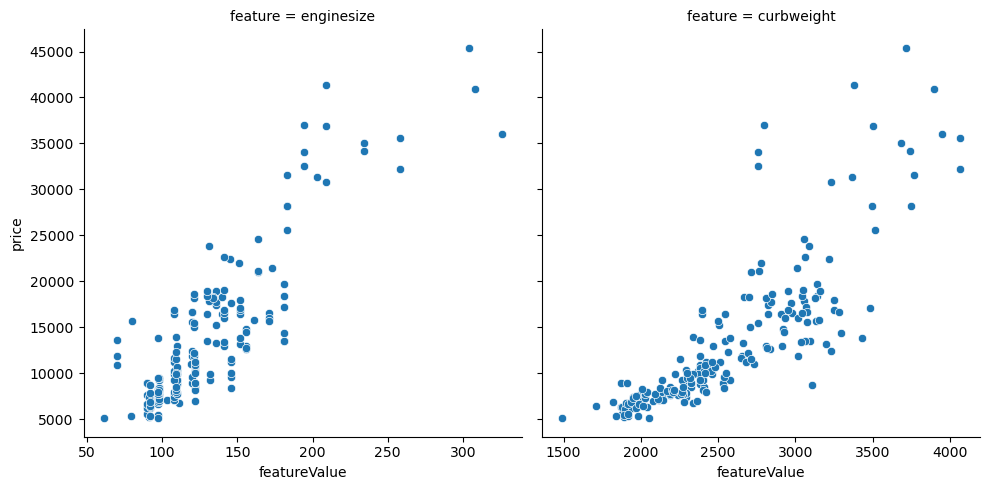

In [12]:
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            col='feature', facet_kws={'sharex':False})

## How to group and apply a single aggregate method

In [14]:
# get the data
fires = pd.read_pickle('fires_by_month.pkl')
fires = fires.reset_index(drop=True)

In [15]:
fires.head(3)

state  fire_year  fire_month  acres_burned  days_burning  fire_count
0    AK       1992           5        4202.0         135.0          14
1    AK       1992           6       86401.0         417.0          23
2    AK       1992           7       48516.7         500.0          26

In [16]:
fires.groupby('state').mean().head(3)

fire_year  fire_month   acres_burned  days_burning  fire_count
state                                                                  
AK     2003.561151    6.352518  231841.799944    577.467626   18.870504
AL     2003.727599    6.458781    2903.809427     10.344086   14.591398
AR     2004.159533    6.478599    1751.836965      4.404669    5.898833

In [17]:
fires.groupby(['state','fire_year','fire_month']).max().head(3)

acres_burned  days_burning  fire_count
state fire_year fire_month                                        
AK    1992      1                    NaN           NaN         NaN
                2                    NaN           NaN         NaN
                3                    NaN           NaN         NaN

## How to work with a DataFrameGroupBy object

In [25]:
fires.head(3)

state  fire_year  fire_month  acres_burned  days_burning  fire_count
0    AK       1992           5        4202.0         135.0          14
1    AK       1992           6       86401.0         417.0          23
2    AK       1992           7       48516.7         500.0          26

In [27]:
yearly_group = fires.groupby('fire_year', as_index=False)

In [28]:
yearly_sums = yearly_group.sum(numeric_only=True)

In [29]:
yearly_sums = yearly_group.sum(numeric_only=True)
print(yearly_sums.head(3))

   fire_year  fire_month  acres_burned  days_burning  fire_count
0       1992        2127    2123889.91        6230.0        2400
1       1993        2163    2118394.10        7283.0        2400
2       1994        2393    4033880.06       20158.0        3887


In [31]:
yearly_group = fires.groupby('fire_year', as_index=False)
yearly_sums = yearly_group.sum(numeric_only=True)
print(yearly_sums.head(3))

   fire_year  fire_month  acres_burned  days_burning  fire_count
0       1992        2127    2123889.91        6230.0        2400
1       1993        2163    2118394.10        7283.0        2400
2       1994        2393    4033880.06       20158.0        3887


## How to apply multiple aggregate methods

In [33]:
monthly_group = fires.groupby(['state','fire_year','fire_month'])

In [36]:
monthly_group.agg(['sum','count','mean']).head(3)

acres_burned            days_burning             \
                                    sum count mean          sum count mean   
state fire_year fire_month                                                   
AK    1992      1                   0.0     0  NaN          0.0     0  NaN   
                2                   0.0     0  NaN          0.0     0  NaN   
                3                   0.0     0  NaN          0.0     0  NaN   

                           fire_count             
                                  sum count mean  
state fire_year fire_month                        
AK    1992      1                   0     0  NaN  
                2                   0     0  NaN  
                3                   0     0  NaN

In [42]:
monthly_group.days_burning.agg(['sum','count','mean']).head(3)

sum  count  mean
state fire_year fire_month                  
AK    1992      1           0.0      0   NaN
                2           0.0      0   NaN
                3           0.0      0   NaN

In [47]:
df = monthly_group.agg({
    'acres_burned': ['sum', 'max', 'min'],
    'days_burning': ['sum', 'mean'],
})
df.head(3)

acres_burned         days_burning     
                                    sum max min          sum mean
state fire_year fire_month                                       
AK    1992      1                   0.0 NaN NaN          0.0  NaN
                2                   0.0 NaN NaN          0.0  NaN
                3                   0.0 NaN NaN          0.0  NaN

## How to use the pivot() method

In [51]:
states = ['AK','CA','ID','TX']
top_states = fires.groupby(['state','fire_year'], as_index=False).sum()
top_states = top_states.query('state in @states')
top_states.head(2)

state  fire_year  fire_month  acres_burned  days_burning  fire_count
0    AK       1992          35      142444.7        1145.0          68
1    AK       1993          30      686630.5        3373.0         144

In [53]:
top_states.pivot(index='fire_year', columns='state', values='acres_burned').head(2)

state            AK        CA        ID        TX
fire_year                                        
1992       142444.7  289254.9  683495.2   31500.3
1993       686630.5  315011.1    7658.5  114265.5

<Axes: xlabel='fire_year'>

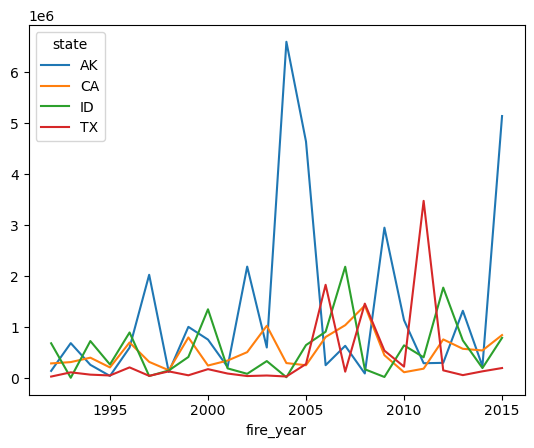

In [54]:
top_states.pivot(index='fire_year', columns='state', values='acres_burned').plot()

## How to use the pivot_table() method

In [56]:
states = ['AK','CA','ID','TX']
fires_top_4 = fires.query('state in @states')
fires_top_4 = fires_top_4.pivot_table(index='fire_year', columns='state', 
                                      values='acres_burned', aggfunc='sum')
fires_top_4.head(2)

state            AK   AL   AR   AZ        CA   CO   CT   DE   FL   GA  ...  \
fire_year                                                              ...   
1992       142444.7  0.0  0.0  0.0  289254.9  0.0  0.0  0.0  0.0  0.0  ...   
1993       686630.5  0.0  0.0  0.0  315011.1  0.0  0.0  0.0  0.0  0.0  ...   

state       SD   TN        TX   UT   VA   VT   WA   WI   WV   WY  
fire_year                                                         
1992       0.0  0.0   31500.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1993       0.0  0.0  114265.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 51 columns]

<Axes: xlabel='fire_year'>

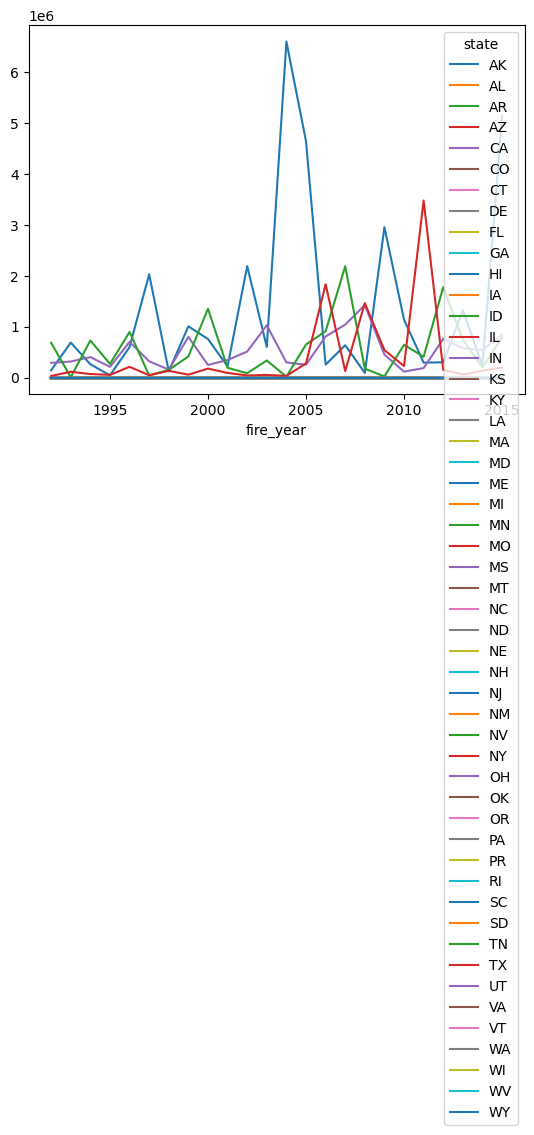

In [59]:
fires_top_4.plot()

## How to create bins of equal size

In [63]:
fires_filtered = fires.query('fire_year == 2010 and days_burning > 0').dropna()

In [64]:
pd.cut(fires_filtered.acres_burned, bins=4)

105     (-597.981, 152005.35]
106     (455996.05, 607991.4]
107     (304000.7, 455996.05]
108     (152005.35, 304000.7]
109     (-597.981, 152005.35]
                ...          
9244    (-597.981, 152005.35]
9245    (-597.981, 152005.35]
9246    (-597.981, 152005.35]
9247    (-597.981, 152005.35]
9248    (-597.981, 152005.35]
Name: acres_burned, Length: 244, dtype: category
Categories (4, interval[float64, right]): [(-597.981, 152005.35] < (152005.35, 304000.7] < (304000.7, 455996.05] < (455996.05, 607991.4]]

In [65]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000])

105          (0.0, 100000.0]
106                      NaN
107     (300000.0, 400000.0]
108     (200000.0, 300000.0]
109          (0.0, 100000.0]
                ...         
9244         (0.0, 100000.0]
9245         (0.0, 100000.0]
9246         (0.0, 100000.0]
9247         (0.0, 100000.0]
9248         (0.0, 100000.0]
Name: acres_burned, Length: 244, dtype: category
Categories (4, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000]]

In [66]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large'])

105          small
106            NaN
107     very large
108          large
109          small
           ...    
9244         small
9245         small
9246         small
9247         small
9248         small
Name: acres_burned, Length: 244, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [68]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large']).value_counts()

acres_burned
small         239
medium          1
large           1
very large      1
Name: count, dtype: int64

## How to create bins with equal numbers of unique items

In [75]:
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large'])

105         medium
106     very large
107     very large
108     very large
109          small
           ...    
9244    very large
9245    very large
9246    very large
9247    very large
9248        medium
Name: acres_burned, Length: 244, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [76]:
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large']).value_counts()

acres_burned
small         62
large         61
very large    61
medium        60
Name: count, dtype: int64

In [79]:
fires_filtered['fire_size'] = pd.qcut(fires_filtered.acres_burned, q=4,
    labels=['small','medium','large','very large'])

In [81]:
pd.qcut(fires_filtered.days_burning, q=4,
        labels=['very short', 'short', 'medium', 'long'], duplicates='drop').value_counts()

days_burning
very short    69
medium        61
long          61
short         53
Name: count, dtype: int64

## How to plot the binned data

In [84]:
fires_filtered.head()

state  fire_year  fire_month  acres_burned  days_burning  fire_count  \
105    AK       2010           4        1532.4         119.0           8   
106    AK       2010           5      607991.4        2271.0          60   
107    AK       2010           6      316850.9        2261.0          80   
108    AK       2010           7      206546.3        1413.0          57   
109    AK       2010           8         145.4          28.0           2   

      fire_size  
105      medium  
106  very large  
107  very large  
108  very large  
109       small

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


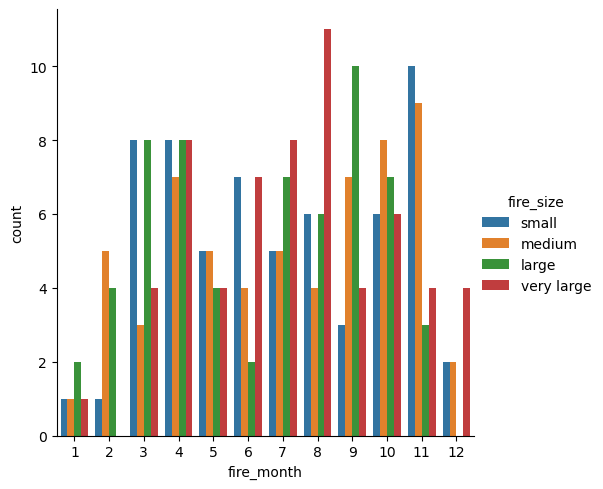

In [86]:
sns.catplot(data=fires_filtered, kind='count', x='fire_month', hue='fire_size')

## How to get the top n rows

In [89]:
cars.nlargest(n=6, columns='enginesize')

aspiration  carbody  enginesize  curbweight    price
49        std    sedan         326        3950  36000.0
73        std    sedan         308        3900  40960.0
74        std  hardtop         304        3715  45400.0
47        std    sedan         258        4066  32250.0
48        std    sedan         258        4066  35550.0
71        std    sedan         234        3740  34184.0

In [91]:
cars.nlargest(n=6, columns=['enginesize','price'])

aspiration      carbody  enginesize  curbweight    price
49        std        sedan         326        3950  36000.0
73        std        sedan         308        3900  40960.0
74        std      hardtop         304        3715  45400.0
48        std        sedan         258        4066  35550.0
47        std        sedan         258        4066  32250.0
72        std  convertible         234        3685  35056.0

## How to calculate percent change

In [94]:
df = fires[['state','fire_year','acres_burned']] \
    .groupby(['state','fire_year']).sum()
df.head()

acres_burned
state fire_year              
AK    1992           142444.7
      1993           686630.5
      1994           261604.7
      1995            43762.6
      1996           598407.2

In [96]:
df.pct_change()

acres_burned
state fire_year              
AK    1992                NaN
      1993           3.820330
      1994          -0.619002
      1995          -0.832715
      1996          12.673941
...                       ...
WY    2011           0.552941
      2012           2.582104
      2013          -0.888021
      2014          -0.866764
      2015           4.046849

[1224 rows x 1 columns]

## How to rank rows

In [99]:
df = fires.groupby('state').sum() \
    [['acres_burned','fire_year','days_burning']]
df.head(3)

acres_burned  fire_year  days_burning
state                                       
AK     3.222601e+07     278495       80268.0
AL     8.101628e+05     559040        2886.0
AR     4.502221e+05     515069        1132.0

In [101]:
df['acres_rank'] = df.acres_burned.rank(ascending=False)
df.head(3)

acres_burned  fire_year  days_burning  acres_rank
state                                                   
AK     3.222601e+07     278495       80268.0         1.0
AL     8.101628e+05     559040        2886.0        23.0
AR     4.502221e+05     515069        1132.0        27.0

In [103]:
df['days_rank'] = df.days_burning.rank(method='max')
df.sort_values('days_burning').head(4)

acres_burned  fire_year  days_burning  acres_rank  days_rank
state                                                              
RI           147.45      12044           0.0        51.0        1.0
VT           985.70      28121           6.0        50.0        3.0
CT          7358.20     124093           6.0        46.0        3.0
NH          1232.23      50100           9.0        49.0        4.0